In [5]:
import nltk

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haias\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
from sklearn import metrics


In [47]:
df = pd.read_csv("C:\\Users\\haias\\OneDrive\\Documents\\latihan zidan\\Praktikum 1\\Praktikum 1\\Bahan data\\ISEAR.csv", header=None)
df.head()


,0,1,2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [48]:
col = [0,1]
new_df = df [col]
new_df = new_df[pd.notnull(df[1])]
new_df.columns = ['Emotion','Text']
new_df.head()

,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


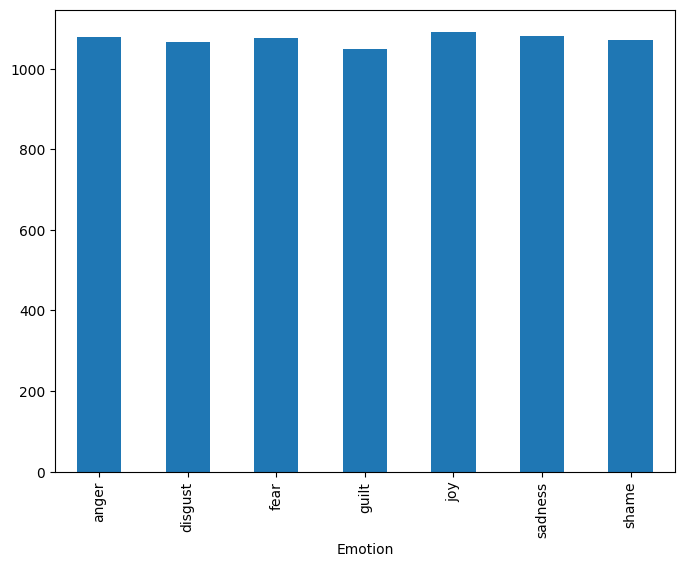

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
new_df.groupby('Emotion').Text.count().plot.bar(ylim=0)
plt.show()



In [49]:
new_df['Text']
new_df['Emotion']

0           joy
1          fear
2         anger
3       sadness
4       disgust
         ...   
7511      shame
7512      shame
7513       fear
7514      guilt
7515       fear
Name: Emotion, Length: 7516, dtype: object

In [50]:
def getTokenizedList(input_df):
    tokenizedList = []
    for i in range(0, len(input_df)):
        curText = input_df[i].iloc[i]
        curText = curText.replace('\n', '')
        curTokenized = word_tokenize(curText)
        tokenizedList.append(curTokenized)

    tokenizedListWithoutPunct = []
    punctList = list(string.punctuation)
    for i in range(0, len(tokenizedList)):
        curList = tokenizedList[i]
        newList = []
        for word in curList:
            if (word.lower()) not in punctList:
                newList.append(word.lower())
        tokenizedListWithoutPunct.append(newList)

    mystemmer = PorterStemmer()
    tokenizedStemmed = []
    for i in range(0, len(tokenizedListWithoutPunct)):
        curList = tokenizedListWithoutPunct[i]
        newList = []
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenizedStemmed.append(newList)
    
    return tokenizedStemmed

In [51]:


def transformSentence(sent):
    s = []
    sent = sent.replace('\n', '')
    sentTokenized = word_tokenize(sent)
    s.append(sentTokenized)
    withoutPunct = []
    punctList = list(string.punctuation)
    curList = s[0]
    newSentList = []
    for word in curList:
        if (word.lower()) not in punctList:
            newSentList.append(word.lower())
    withoutPunct.append(newSentList)

    mystemmer = PorterStemmer()
    tokenizedStemmed = []
    for i in range(0, len(withoutPunct)):
        curList = withoutPunct[i]
        newList = []
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenizedStemmed.append(newList)
    
    return tokenizedStemmed

In [56]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haias\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
!python -m nltk.downloader punkt

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haias\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\haias\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\haias\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\haias\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\haias\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\haias\AppData\Roaming\nltk_data...
[

True

In [81]:
def getTokenizedList(input_df):
    tokenizedList = []
    for i in range(0, len(input_df)):
        curText = input_df['Text'].iloc[i]
        curText = curText.replace('\n', '')
        curTokenized = word_tokenize(curText)
        tokenizedList.append(curTokenized)

    tokenizedListWithoutPunct = []
    punctList = list(string.punctuation)  # Perbaiki penulisan di sini
    for i in range(0, len(tokenizedList)):
        curList = tokenizedList[i]
        newList = []
        for word in curList:  # Pastikan penamaan konsisten
            if word.lower() not in punctList:
                newList.append(word.lower())
        tokenizedListWithoutPunct.append(newList)


In [82]:
new_df['Text']=getTokenizedList(new_df)
#new_df['Text']

In [66]:
X_train, X_test, Y_train, Y_test=train_test_split(new_df['Text'],new_df['Emotion'], test_size=.3,random_state=1)

In [67]:
#Function to pass the list to the Tfidf vectorizer
def returnPhrase(inputList):
    return inputList


In [68]:
#Extracting features for Naive Bayes 

myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3)) 
myVectorizer.fit(X_train) 
transformedTrain=myVectorizer.transform(X_train).toarray() 
transformedTest=myVectorizer.transform(X_test).toarray() 

In [69]:
curAlpha=0.33 #smoothing factor in NB
NBClassifier=MultinomialNB(alpha=curAlpha)
NBClassifier.fit(transformedTrain,Y_train)
myPredTest=NBClassifier.predict(transformedTest)
print('Best Acc Naive Bayes')
#print (curAlpha)
print(np.sum(myPredTest==Y_test)/len(Y_test))


Best Acc Naive Bayes
0.5121951219512195


In [70]:
print('Metrics Classification Report : Naive Bayes')
print(metrics.classification_report(Y_test, myPredTest))


Metrics Classification Report : Naive Bayes
              precision    recall  f1-score   support

       anger       0.41      0.43      0.42       331
     disgust       0.65      0.46      0.54       324
        fear       0.58      0.66      0.62       311
       guilt       0.34      0.52      0.41       299
         joy       0.61      0.59      0.60       323
     sadness       0.66      0.54      0.59       351
       shame       0.45      0.40      0.42       316

    accuracy                           0.51      2255
   macro avg       0.53      0.51      0.51      2255
weighted avg       0.53      0.51      0.52      2255



In [71]:
myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3)) 
myVectorizer.fit(X_train) 
transformedTrain=myVectorizer.transform(X_train).toarray() 
transformedTest=myVectorizer.transform(X_test).toarray() 

In [72]:
curC=2    #cost factor in SVM
SVMClassifier=svm.LinearSVC(C=curC)
SVMClassifier.fit(transformedTrain,Y_train)
myPredTest=SVMClassifier.predict(transformedTest)
print('Best Acc SVM')
#print (curC)
print(np.sum(myPredTest==Y_test)/len(Y_test))


Best Acc SVM
0.5627494456762749


In [73]:
print('Metrics Classification Report : SVM')
print(metrics. classification_report(Y_test, myPredTest))


Metrics Classification Report : SVM
              precision    recall  f1-score   support

       anger       0.47      0.44      0.46       331
     disgust       0.60      0.58      0.59       324
        fear       0.68      0.68      0.68       311
       guilt       0.46      0.48      0.47       299
         joy       0.64      0.69      0.66       323
     sadness       0.61      0.64      0.63       351
       shame       0.45      0.42      0.43       316

    accuracy                           0.56      2255
   macro avg       0.56      0.56      0.56      2255
weighted avg       0.56      0.56      0.56      2255



In [74]:
#To predict the emotion of a sentence using Naive Bayes
def predictSentNB(sent):
    sentPred = NBClassifier.predict(myVectorizer. transform(transformSentence(sent)).toarray())
    return sentPred


In [75]:
#To predict the emotion of a sentence using Naive Bayes
def predictSentSVM(sent):
    sentPred = SVMClassifier.predict(myVectorizer. transform(transformSentence(sent)).toarray())
    return sentPred


In [76]:
sent = "I love you to the moon and back"

#Printing the predicted emotion
print("Navie bayes prediction")
print(predictSentNB(sent))
print("SVM prediction")
print(predictSentSVM(sent))


Navie bayes prediction
['disgust']
SVM prediction
['guilt']


In [78]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


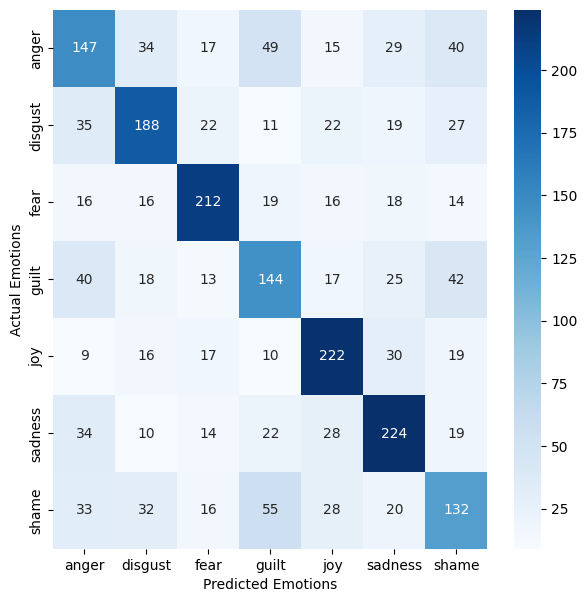

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar emosi yang akan digunakan sebagai label pada Confusion Matrix
labels = ['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']

# Membuat Confusion Matrix
cm = confusion_matrix(Y_test, myPredTest, labels=labels)

# Membuat visualisasi heatmap untuk Confusion Matrix
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=labels, yticklabels=labels, cmap='Blues')

plt.ylabel('Actual Emotions')
plt.xlabel('Predicted Emotions')
plt.show()


In [23]:
print("Berbagi Pengalaman")

Berbagi Pengalaman
